# LOS ANGELES COUNTY RESTAURANT AND MARKET INSPECTIONS

#### Environmental Health Inspection Results for Restaurants and Markets in Los Angeles County

### The manual and other information about the dataset can be found here:

https://data.lacounty.gov/Health/LOS-ANGELES-COUNTY-RESTAURANT-AND-MARKET-INSPECTIO/6ni6-h5kp

### Import the needed libraries

In [126]:
#Author: Ernest Mack
#Date Started: 10/26/19

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

%matplotlib inline

### Read in the dataset and assign it to a dataframe variable

In [127]:
df = pd.read_csv(r'C:\Users\emack\Documents\Sandbox\LOS_ANGELES_COUNTY_RESTAURANT_AND_MARKET_INSPECTIONS.csv')

### Print out some dataset information

In [128]:
df.head()
df.info()
df.isnull().sum()
print(df.columns)
max_rows = (df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202339 entries, 0 to 202338
Data columns (total 21 columns):
ACTIVITY DATE           202339 non-null object
OWNER ID                202339 non-null object
OWNER NAME              202339 non-null object
FACILITY ID             202339 non-null object
FACILITY NAME           202339 non-null object
RECORD ID               202339 non-null object
PROGRAM NAME            202339 non-null object
PROGRAM STATUS          202339 non-null object
PROGRAM ELEMENT (PE)    202339 non-null int64
PE DESCRIPTION          202339 non-null object
FACILITY ADDRESS        202339 non-null object
FACILITY CITY           202339 non-null object
FACILITY STATE          202339 non-null object
FACILITY ZIP            202339 non-null object
SERVICE CODE            202339 non-null int64
SERVICE DESCRIPTION     202339 non-null object
SCORE                   202339 non-null int64
GRADE                   202260 non-null object
SERIAL NUMBER           202339 non-null object

# Get the scores.
### In this cell I isolate the inspection scores the ranges as shown and save them in seperate variables for plotting later

In [130]:
lowest_scores = df[df['SCORE'].between(0, 55, inclusive=True)]
lower_scores = df[df['SCORE'].between(56, 70, inclusive=True)]
middle_scores = df[df['SCORE'].between(71, 75, inclusive=True)]
upper_scores = df[df['SCORE'].between(76, 100, inclusive=True)]

#get a count of tbhe scores and assign to variables for each
count_lower = lower_scores.count()
count_middle = middle_scores.count()
count_upper =upper_scores.count()

print('The number of scores in the 0-55% range are ',count_lower[0])
print('The number of scores in the 56-70% range are ',count_middle[0])
print('The number of scores in the 71-75% range are ',count_upper[0])
print('The number of scores in the 76-100% range are ',count_upper[0])

The number of scores in the 0-55% range are  176
The number of scores in the 56-70% range are  544
The number of scores in the 71-75% range are  201616
The number of scores in the 76-100% range are  201616


# Restaurants with scores up to 70% and below. 

### I only print the first 30 rows in the range for reference.

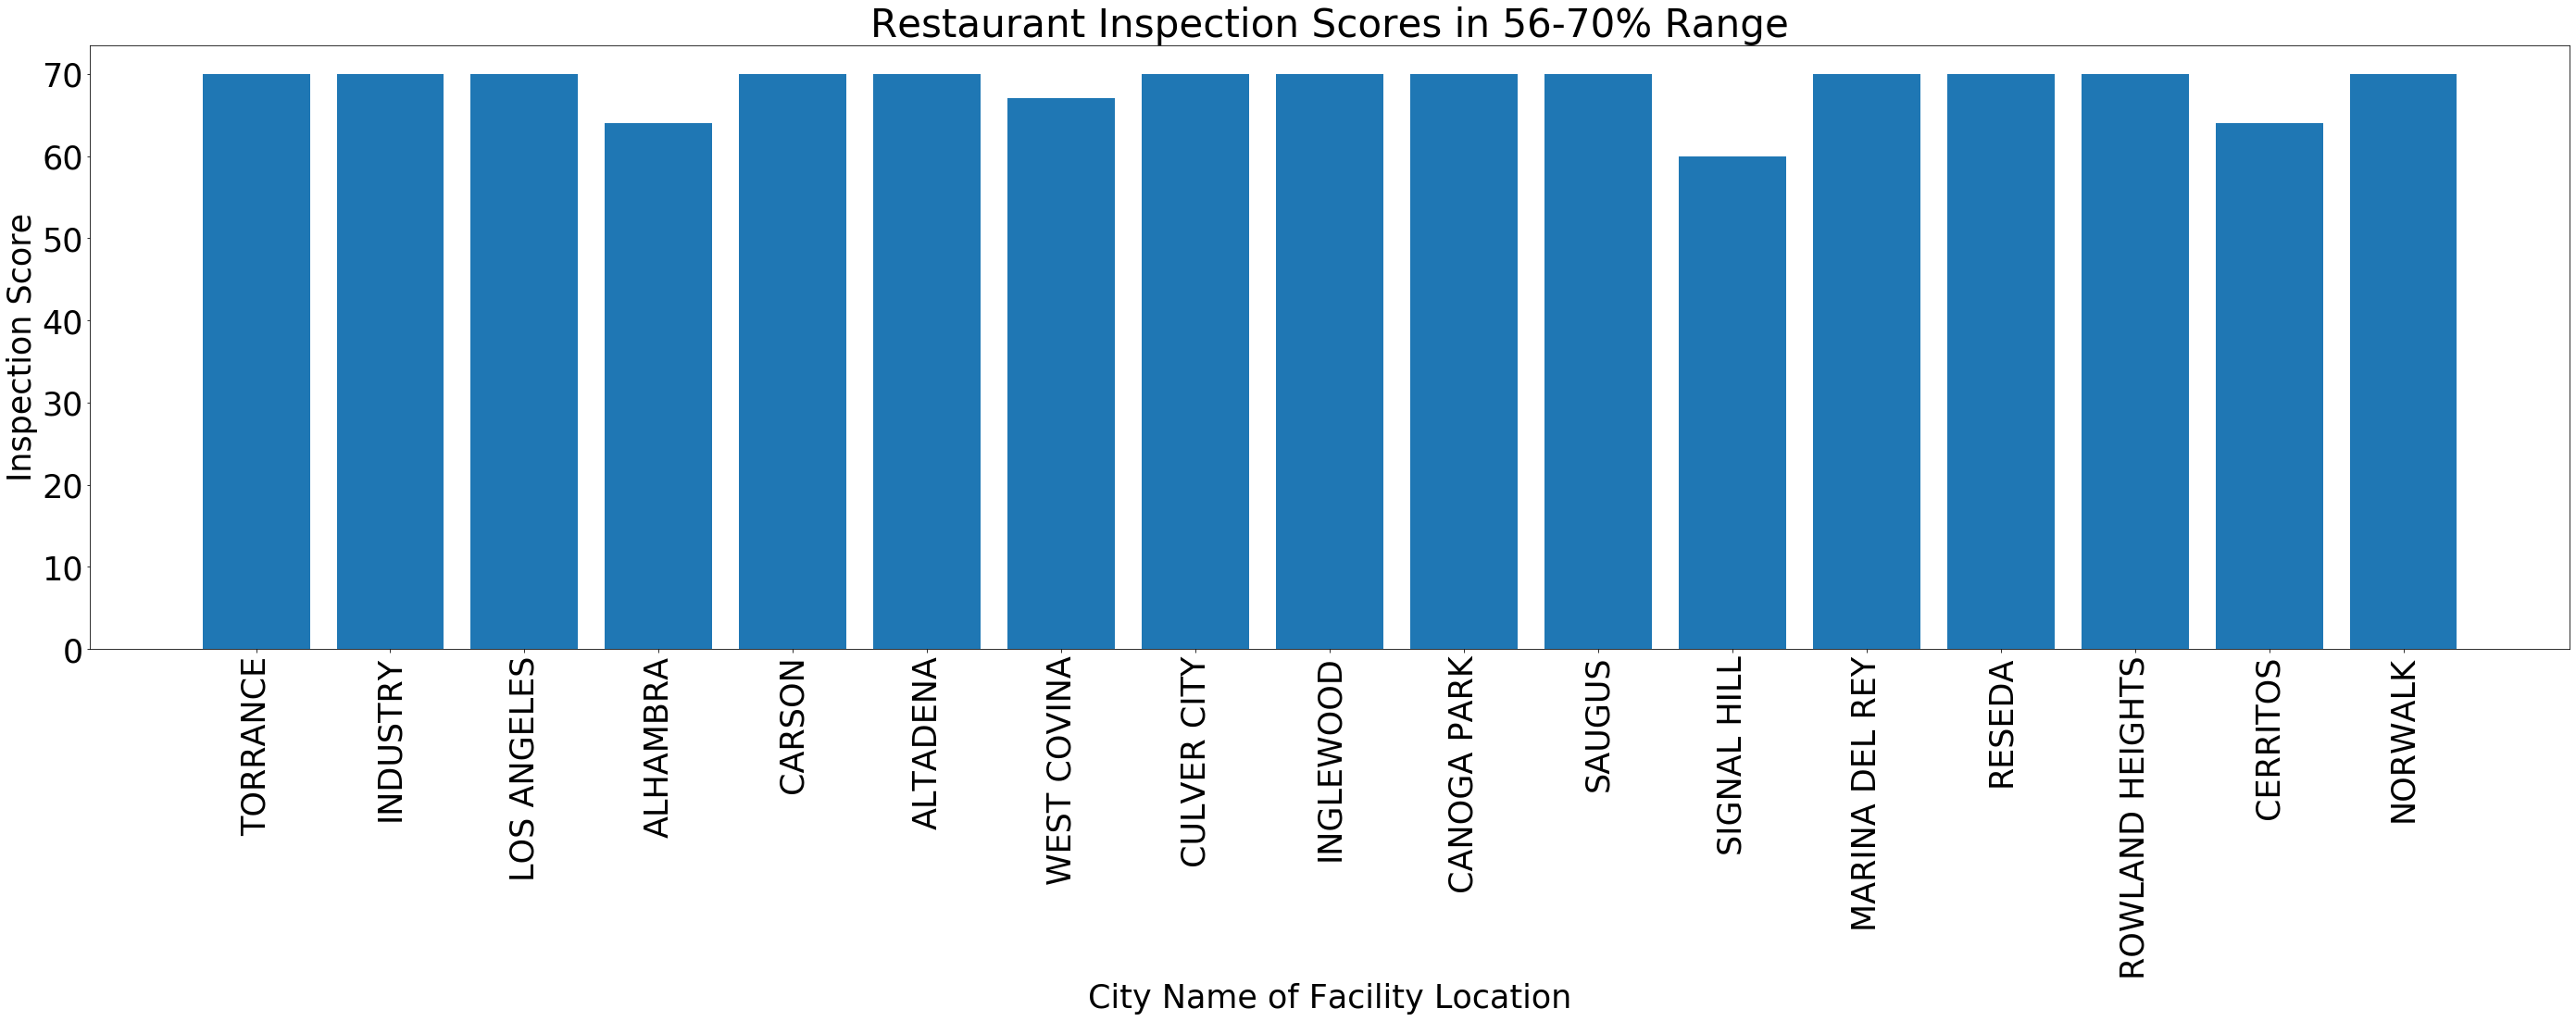

In [139]:
plt.figure(figsize=[48, 12])
plt.rcParams.update({'font.size': 35})
plt.bar(lower_scores['FACILITY CITY'][:30], lower_scores['SCORE'][:30])
plt.xlabel('City Name of Facility Location')
plt.ylabel('Inspection Score')
plt.title('Restaurant Inspection Scores in 56-70% Range')
plt.xticks(rotation=90)

plt.show()

# Restaurants with scores 71 - 75%

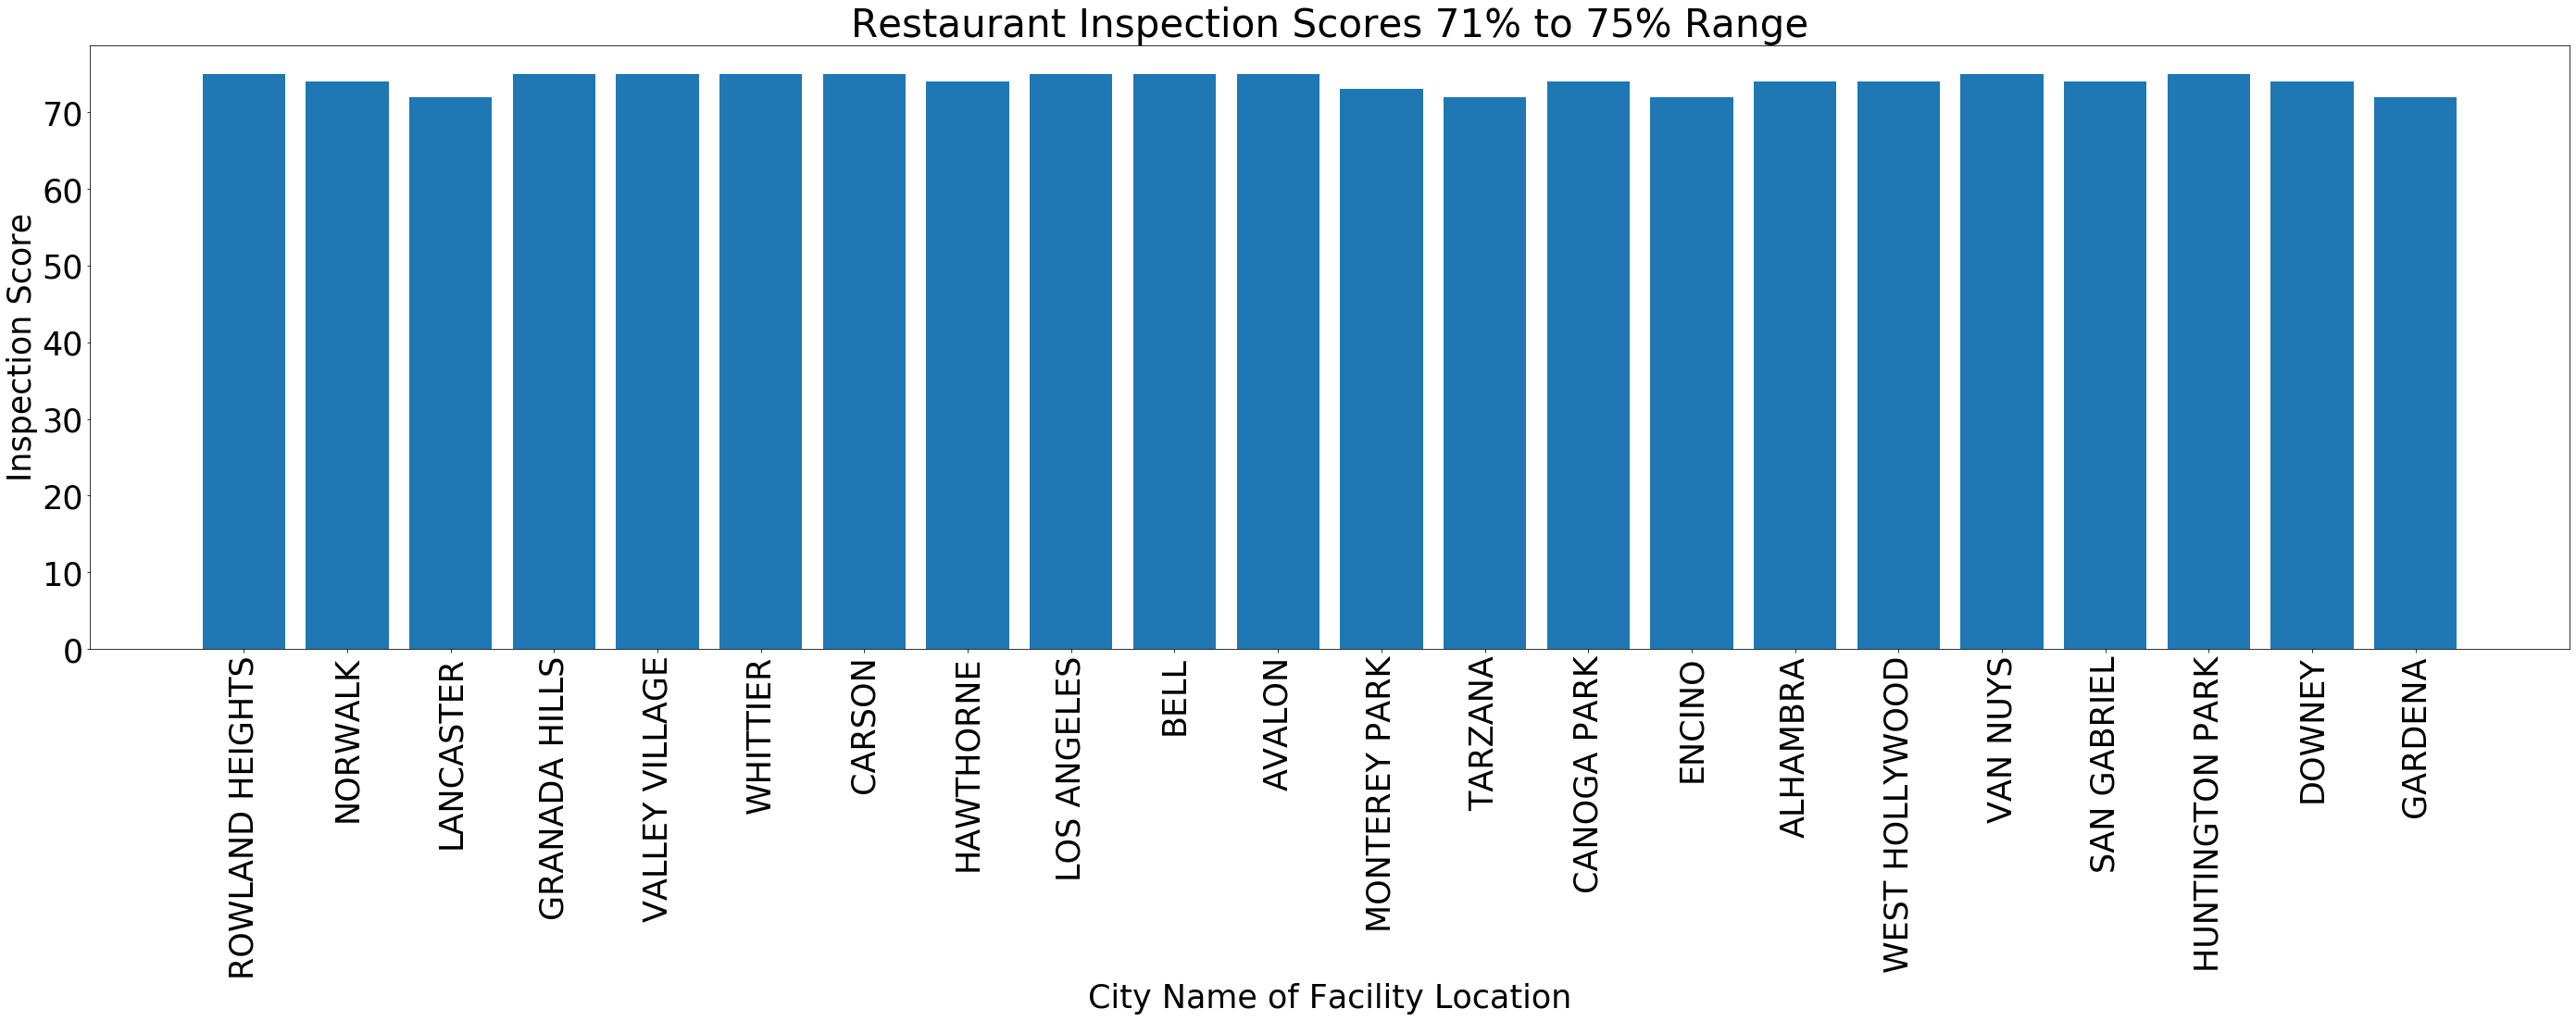

In [140]:
plt.figure(figsize=[48, 12])
plt.rcParams.update({'font.size': 35})
plt.bar(middle_scores['FACILITY CITY'][:30], middle_scores['SCORE'][:30])
plt.xlabel('City Name of Facility Location')
plt.ylabel('Inspection Score')
plt.title('Restaurant Inspection Scores 71% to 75% Range')
plt.xticks(rotation=90)

plt.show()

# Restaurants with scores 76-100

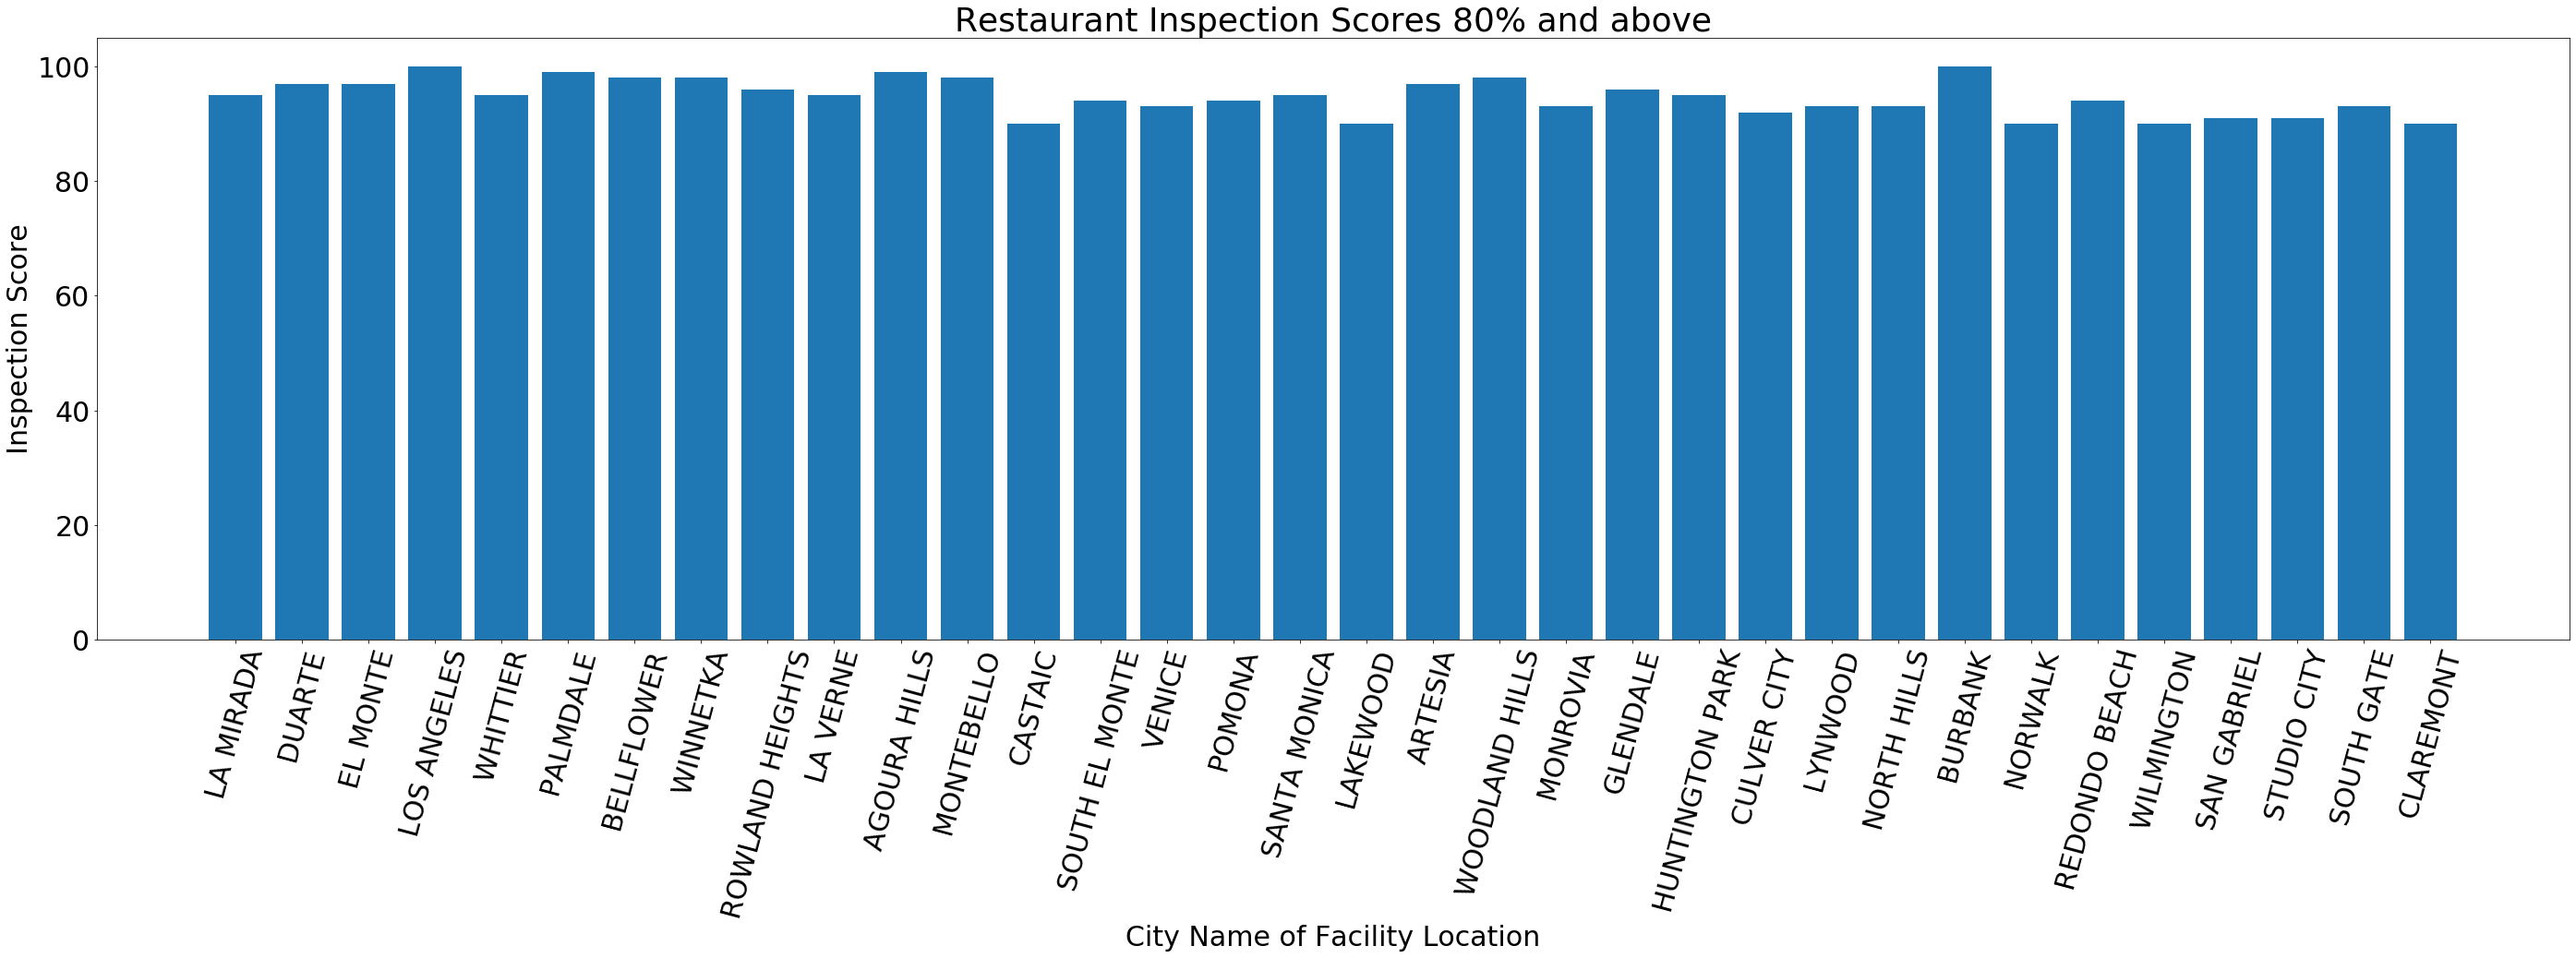

In [141]:
plt.figure(figsize=[48, 12])
plt.rcParams.update({'font.size': 30})
plt.bar(upper_scores['FACILITY CITY'][:60], upper_scores['SCORE'][:60])
plt.xlabel('City Name of Facility Location')
plt.ylabel('Inspection Score')
plt.title('Restaurant Inspection Scores 80% and above')
plt.xticks(rotation=75)
plt.show()

# Restaurants with scores below 50%-Yes only 3 restaurants made the list so far

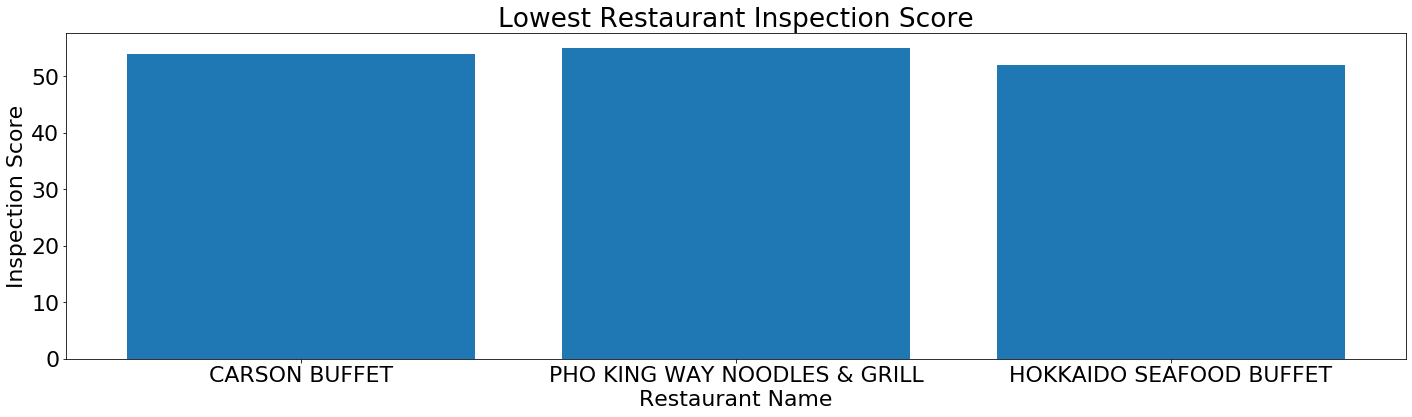

In [142]:
plt.figure(figsize=[24, 6])
plt.rcParams.update({'font.size': 22})
plt.bar(lowest_scores['FACILITY NAME'][:30], lowest_scores['SCORE'][:30])
plt.xlabel('Restaurant Name')
plt.ylabel('Inspection Score')
plt.title('Lowest Restaurant Inspection Score')
plt.xticks(rotation=0)
plt.show()

## Create a dataframe from scratch (this is an exercise to understand dataframes)

In [143]:
df_name = pd.DataFrame({'col_name_1':['d','a','t','a', 1], 'col_name_2':['d','a','t','a', 2]})
df_name.shape

(5, 2)

### From above we can see that we now have a 2-dimensional array with 5 columns and 2 rows as shown in the tuple (5, 2)

In [154]:
#create a dataframe; the format is
#df_name = pd.DataFrame({'col_name_1':['d','a','t','a', 1], 'col_name_2':['d','a','t','a', 2]})

df_scratch = pd.DataFrame({'Y_Value':[.5,.7,1.2], 'X_Value':[3, 4, 8]})

In [155]:
df_scratch


,Y_Value,X_Value
0,0.5,3
1,0.7,4
2,1.2,8


In [156]:
df_scratch.shape

(3, 2)

# Plot the dataframe I created from scratch

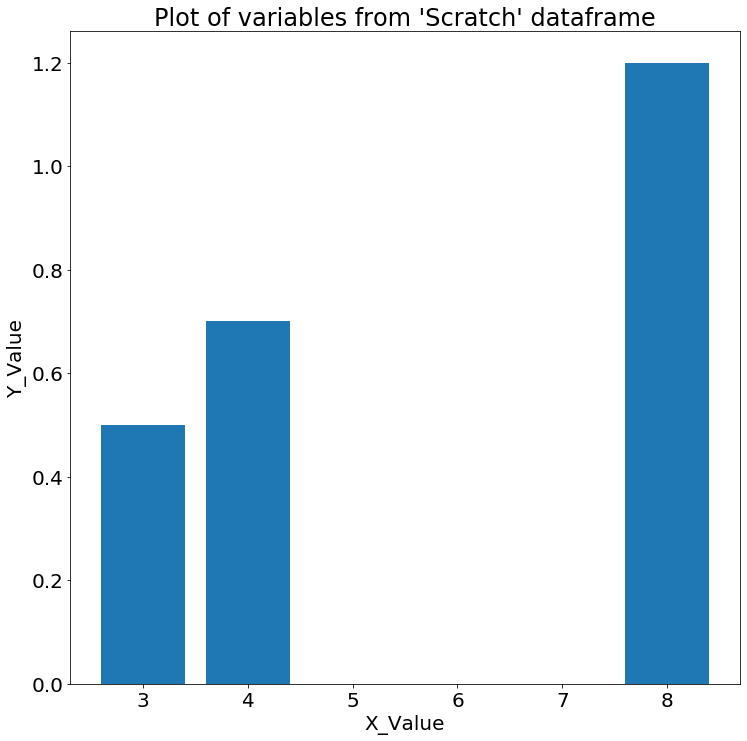

In [157]:
plt.figure(figsize=[12, 12])
plt.rcParams.update({'font.size': 20})
plt.bar(df_scratch['X_Value'][:60], df_scratch['Y_Value'][:60])
plt.xlabel('X_Value')
plt.ylabel('Y_Value')
plt.title("Plot of variables from 'Scratch' dataframe")
plt.xticks(rotation=0)
plt.show()

# Create a new dataframe to store our frequency table columns from the health department dataset.
### I had to create a new dataframe to plot this out because I created a new column with data that shows the count of same-score occurances.

This is necessary because using the 'value_counts()' method produces a one dimensional array which produces only one column. I need two columns in order to fill the x and y parameters of bar plot method below. By using the value_counts method I am able get a count of the occurances of specific inspection scores and rates of their occurances. 

In [160]:
df2 = df['SCORE'] #create a dataframe holding just the 'SCORE' column values

#now get the counts of each inspection score and assign the results to a variable
value_counts = df['SCORE'].value_counts(dropna=True, sort=True)

#now create the new dataframe composed of the new columns 'Scores' and 'Counts'
df5 = value_counts.rename_axis('Scores').reset_index(name='Counts')

type(df5) #check to make sure it is a pandas dataframe

pandas.core.frame.DataFrame

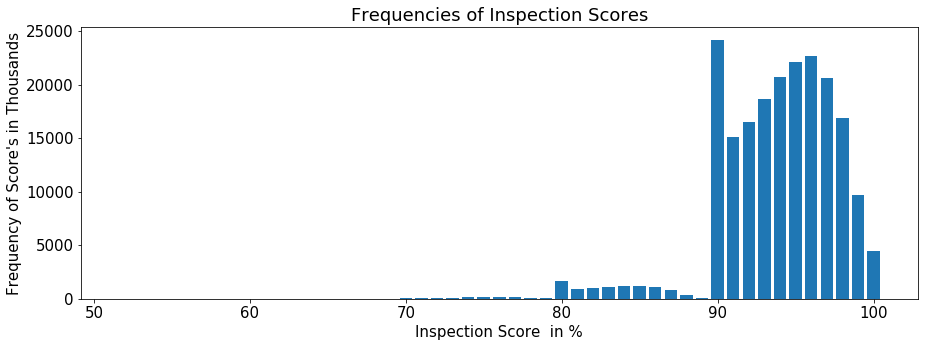

In [161]:
plt.figure(figsize=[15, 5])
plt.rcParams.update({'font.size': 15})
plt.bar(df5['Scores'], df5['Counts'])
plt.xlabel('Inspection Score  in %')
plt.ylabel("Frequency of Score's in Thousands")
plt.title('Frequencies of Inspection Scores')
plt.xticks(rotation=0)
plt.show()